In [34]:
reset()
%display latex

# Binárias Compactas no regime Newtoniano

Os cálculos realizados neste notebook seguem os passos presentes no cap. 4.1 do livro [Gravitational Waves - Vol.1](https://www.amazon.com.br/Gravitational-Waves-1-Theory-Experiments/dp/0198570740).

## Variáveis

In [35]:
var('c G m1 m2 m mu r R t iota theta phi')
# c - veloc. da luz
# G - const. gravitacional
# m1 - massa do corpo 1
# m2 - massa do corpo 2
# m = m1 + m2 - massa total do sist.
# mu = m1*m2/m - massa reduzida
# r = |x - y| - distância binaŕia-Terra
# R = raio orbital - l0
# t - tempo
# iota/theta - ângulo normal à orbita
# phi - ângulo do observador

(c, G, m1, m2, m, mu, r, R, t, iota, theta, phi)

In [36]:
omegas = var('omegas', latex_name=r'\omega_s')       # freq. orb. fonte
fs = var('fs', latex_name=r'f_s')                    # freq. da fonte
msol = var('msol', latex_name = r'M_\odot')          # massa do Sol
Mc = var(r'M_c')                                     # massa de chilrear
fgw = var('fgw', latex_name=r'f_{gw}')               # freq. onda gravitacional
omegagw = var('omegagw', latex_name=r'\omega_{gw}')  # freq. orb. da onda
tr = var(r't_r')                                     # tempo retardado 
fgw, omegagw, omegas, fs, msol, Mc, t_r

(fgw, omegagw, omegas, fs, msol, M_c, t_r)

## Parâmetros

In [37]:
import scipy.constants as const

In [38]:
parametros_1 = {G:const.G, c:const.speed_of_light, msol:1.99*10^(30), r:1.5*10^(20)}
parametro_R = {R:0.19*10^(10)}
parametros_2 = {m1:1.441*msol,m2:1.387*msol}
parametros_3 = {omegas:(G*m/R^3)^2, mu:(m1*m2)/m, omegagw:2*omegas, fgw:omegagw/(2*pi), tr:t - r/c}

In [39]:
parametros_1

{G: 6.6743e-11,
 c: 299792458.0,
 msol: 1.99000000000000e30,
 r: 1.50000000000000e20}

In [40]:
parametros_2

{m1: 1.44100000000000*msol, m2: 1.38700000000000*msol}

In [41]:
parametros_3

{omegas: G^2*m^2/R^6,
 mu: m1*m2/m,
 omegagw: 2*omegas,
 fgw: 1/2*omegagw/pi,
 t_r: t - r/c}

Obs.: $\textit{Chirp mass}$ $M_c$ de um sistema binário compacto determina a evolução orbital de ordem líder do sistema como resultado da perda de energia resultante da emissão de ondas gravitacionais.

---

Neste notebook, aplicaremos o formalismo Newtoniano num sistema binário compacto, e o trataremos como partículas pontuais. Por familiaridade, utilizaremos os dados referentes à $\textit{Binária de Hulse-Taylor}$. Aqui, veremos como a coalescência desse sistema afeta a emissão das ondas gravitacionais.

- Orbita Circular Kepleriana:

Em uma paroximação newtoniana, no referencial do centro de massa, a dinâmica da binária se reduz à um problema de um corpo, com sua massa igual à massa reduzida do sistema $\mu = m_1 m_2/m$.

In [42]:
m = m1 + m2
m

m1 + m2

In [43]:
mu = (m1*m2)/(m1 + m2)
mu

m1*m2/(m1 + m2)

Como estamos considerando o caso de órbita circular, a frequência orbital $\omega_s$ se relaciona com a distância orbital $R$ por meio da $\textit{Lei de Kepler}$:
$$
\begin{align}
    \omega_s^2 = \frac{Gm}{R^3}
\end{align}
$$

In [44]:
omegas = (G*m/R^3)^2
omegas

G^2*(m1 + m2)^2/R^6

E as amplitude das ondas gravitacinais correspondentes são expressas na forma:
$$
\begin{align}
    h_+(t; \theta, \phi) &= \frac{1}{r}\frac{4G\mu \omega_s^2R^2}{c^4}\left(\frac{1 + \cos^2{\theta}}{2}\right)\cos{(2 \omega_s t_{ret} + 2 \phi)}\\
    h_{\times}(t; \theta, \phi) &= \frac{1}{r}\frac{4G\mu \omega_s^2R^2}{c^4}\cos{\theta}\sin{(2 \omega_s t_{ret} + 2 \phi)}
\end{align}
$$

Mas nós queremos estudar essas amplitudes até sua coalescência, então teremos que eliminar o $R$ em função de $\omega_s$ e adicional a massa de chilrear $M_c$:
$$
\begin{align}
    M_c = m^{\frac{2}{5}}\mu^{\frac{3}{5}} = \frac{(m_1 m_2)^{\frac{3}{5}}}{(m_1 + m_2)^{\frac{1}{5}}}
\end{align}
$$

In [45]:
Mc = (m)^(2/5)*(mu)^(3/5)

Definindo frequência e freq. orbital da onda gravitacional como $\omega_{gw} = 2\omega_s$ e $f_{gw} = \omega_{gw}/2\pi$, respectivamente:

In [46]:
omegagw = 2*omegas
omegagw

2*G^2*(m1 + m2)^2/R^6

In [47]:
fgw = omegagw/(2*pi)
fgw

G^2*(m1 + m2)^2/(pi*R^6)

Assim, as amplitudes em função da massa de chilrear serão:
$$
\begin{align}
   h_+(t) &= \frac{4}{r}\left(\frac{G M_c}{c^2}\right)^{5/3}\left(\frac{\pi f_{gw}}{c}\right)^{2/3}\frac{1 + \cos^2{\theta}}{2}\cos{(2\pi f_{gw} t_{ret} + 2 \phi)}\qquad &&(1)\\
    h_{\times}(t) &= \frac{4}{r}\left(\frac{G M_c}{c^2}\right)^{5/3}\left(\frac{\pi f_{gw}}{c}\right)^{2/3}\cos{\theta}\sin{(2\pi f_{gw} t_{ret} + 2 \phi)}\qquad &&(2)
\end{align}
$$


In [48]:
h_plus_c = (4/r)*(G*Mc/c^2)^(5/3)*(pi*fgw/c)^(2/3)*((1 + (cos(theta))^2)/2)*(cos(2*pi*fgw*tr + 2*phi))
h_plus_c(t).subs({phi : 0}, {theta : pi/2})

2*m1*m2*((m1 + m2)^(2/5)*t/c^2)^(5/3)*((m1 + m2)^2*t^2/(R^6*c))^(2/3)*cos(2*(m1 + m2)^2*t^2*t_r/R^6)/((m1 + m2)*r)

In [49]:
h_plus_c_para = h_plus_c.subs(parametros_2, parametros_3)
h_plus_c_para

11.3044605520000*(cos(theta)^2 + 1)*msol*(G*msol^(2/5)/c^2)^(5/3)*(G^2*msol^2/(R^6*c))^(2/3)*cos(2*phi + 15.9951680000000*G^2*msol^2*(t - r/c)/R^6)/r

In [50]:
h_plus_c_para = h_plus_c_para.subs(parametros_1, parametro_R)
h_plus_c_para

(1.67740436299423e-30)*(cos(theta)^2 + 1)*cos(2*phi + (5.99770084817033e-15)*t - 0.00300092648503369)

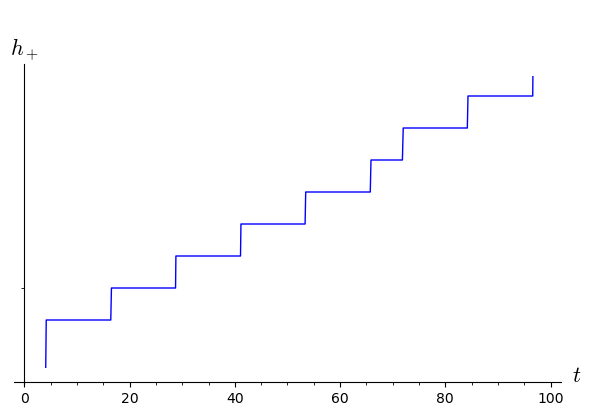

In [51]:
plot(h_plus_c_para.subs({theta : pi/2, phi : 0}),(t,0,100),plot_points=1000, axes_labels=[r'$t$', r'$h_+$'])

In [52]:
h_cross_c = (4/r)*(G*Mc/c^2)^(5/3)*((pi*fgw)/c)^(2/3)*cos(theta)*(sin(2*pi*fgw*tr + 2*phi))
h_cross_c(t).subs({phi : 0}, {theta : pi})

-4*m1*m2*((m1 + m2)^(2/5)*t/c^2)^(5/3)*((m1 + m2)^2*t^2/(R^6*c))^(2/3)*sin(2*(m1 + m2)^2*t^2*t_r/R^6)/((m1 + m2)*r)

In [53]:
h_cross_c_para = h_cross_c.subs(parametros_2, parametros_3)
h_cross_c_para

22.6089211040000*msol*(G*msol^(2/5)/c^2)^(5/3)*(G^2*msol^2/(R^6*c))^(2/3)*cos(theta)*sin(2*phi + 15.9951680000000*G^2*msol^2*(t - r/c)/R^6)/r

In [54]:
h_cross_c_para = h_cross_c_para.subs(parametros_1, parametro_R)
h_cross_c_para

(3.35480872598846e-30)*cos(theta)*sin(2*phi + (5.99770084817033e-15)*t - 0.00300092648503369)

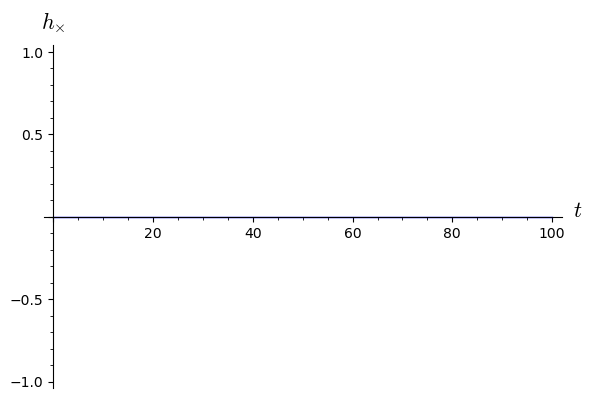

In [55]:
plot(h_cross_c_para.subs({theta : pi/2, phi : 0}),(t,0,100),plot_points=1000, 
                                     axes_labels=[r'$t$', r'$h_{\times}$'])

- Orbita Circular: $\textit{The chirp amplitude}$

As equações $(1)$ e $(2)$ mostram a amplitude de uma onda gravotacional, assumindo que o movimento das fontes é uma dada, fixa, orbita circular kepleriana. Entretanto, a emissão de ondas gravotacionais custa energia e, para compensar essa perda, a distância orbital $R$ deve diminuir ao longo do tempo, assim a energia do sistema se torna mais e mais negativa. 

De acordo com a lei de Kepler, se $R$ diminuir, a frequência $\omega_s$ aumenta. Da mesma forma, se $\omega_s$ aumenta, a potência irradiada pelas ondas gravitacionais também aumentam. A distância orbital deve diminuir ao decorrer do tempo, e teremos um processo descontrolado que, em uma escala longa de tempo suficientemente longa, levará à coalescência do sistema binário. 

Dito isso, a frequência da onda gravitacional emitida pelo sistema deverá formalmente divergir em um tempo infinito de tempo, que denotaremos como o tempo de coalescência $t_c$. Assim, o tempo para a coalescência da binária pode ser expressa por $\tau \equiv t_c - t$:

In [56]:
tc = var(r't_c') # tempo de coalescência
tau = tc - t     # tempo para a coalesc.
tau

-t + t_c

Assim, $f_{gw}$ pode ser expressa por:
$$
\begin{align}
    f_{gw}(\tau) = \frac{1}{\pi}\left(\frac{5}{256\,\tau}\right)^{3/8}\left(\frac{G M_c}{c^3}\right)^{-5/8}
\end{align}
$$

In [57]:
fgw(t) = (1/pi)*(5/(256*tau))^(3/8)*((G*Mc)/(c^3))^(-5/8)
fgw

t |--> 1/8*5^(3/8)*(-1/(t - t_c))^(3/8)/(pi*(G*(m1 + m2)^(2/5)*(m1*m2/(m1 + m2))^(3/5)/c^3)^(5/8))

In [58]:
fgw_para(t) = fgw(t).subs(parametros_2, parametros_3)
fgw_para(t)

0.109791134540443*5^(3/8)*(-1/(t - t_c))^(3/8)/(pi*(G*msol/c^3)^(5/8))

In [59]:
fgw_para(t) = fgw_para(t).subs(parametros_1)
fgw_para(t)

227.808193889408*5^(3/8)*(-1/(t - t_c))^(3/8)/pi

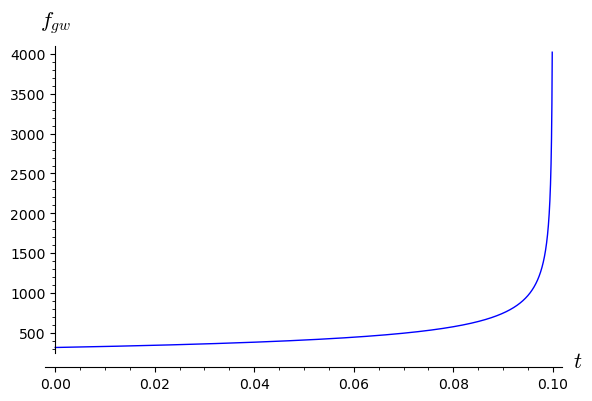

In [60]:
plot(fgw_para(t).subs({tc : .1}),(t,0,.1),plot_points=1000, axes_labels=[r'$t$', r'$f_{gw}$'])

Quanto mais a frequência aumenta, a distância orbital encolhe. A partir da expressão entre a distância radial e a frequência angular da onda, podemos encontrar a função que descreve o comportamento de $R$ conforme o sistema se aproxima da coalescência, na forma:
$$
\begin{align}
    R(\tau) &= R_0 \left(\frac{\tau}{\tau_0}\right)^{1/4}\\
     &= R_0 \left(\frac{t_c - t}{t_c - t_0}\right)^{1/4}
\end{align}
$$

Onde $R_0$ é o valor da distância orbital no tempo incial $t_0$, e $\tau_0 = t_c - t_0$.

In [61]:
t0 = var(r't_0')
R0 = var(r'R_0')

tau0 = tc - t0
tau0

-t_0 + t_c

In [62]:
Rf(t) = R0*(tau/tau0)^(1/4)
Rf(t)

R_0*((t - t_c)/(t_0 - t_c))^(1/4)

In [63]:
p = [plot(Rf(t).subs({t0:0}, {R0 : 0.19*10^(10)}, {tc : j}), (t, 0, j), 
            axes_labels=['$t$', '$R(m)$'], frame = False, axes = True, color=hue(j*10), 
              legend_label=r'$t_c={}$'.format(j.n(digits=2))) for j in srange(0.05, 0.5, 0.12)]

In [64]:
(p[0]).set_legend_options(loc = (0.7, 0.8), title=r'$t_c(Gyr)$')

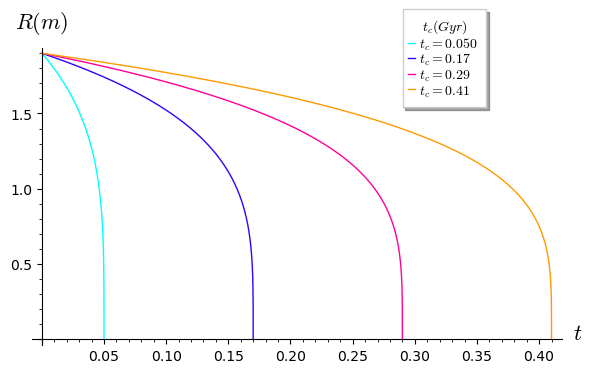

In [65]:
sum(p)

In [66]:
#(sum(p)).save('R_newt.pdf', gridlines=False, title='Distância Orbital - $O(\\epsilon^2)$', frame=False, axes=True)

Como é possível perceber, há um período inicial onde o $R$ decresce suavemente, seguido por uma fase de mergulho, onde a aproximação de uma orbita quase circular não é mais válida. 

In [109]:
teste = h_plus.subs({phi : 0}, {theta : pi}, {Phi0 : 100}, {tc : 100}, {iota : pi/2})
teste = teste.subs(parametros_1, parametros_2, repeat = True)
teste

t |--> (4.02545009530835e-57)*5^(1/4)*msol^(5/4)*(-1/(t - 100))^(1/4)*cos(-6.30234962243830e21*5^(3/8)*(-t + 100)^(5/8)/msol^(5/8) + 100)

In [110]:
assume(m1>0, m2>0, r>0, c>0, t>0)
msol = 1.99*10^(30)

In [111]:
graf(t) = solve(teste, R)
graf(t)

()

In [112]:
#plot(real_nth_root(teste, R), t,-10,10)

TypeError: cannot coerce arguments: no canonical coercion from Callable function ring with argument t to Symbolic Ring

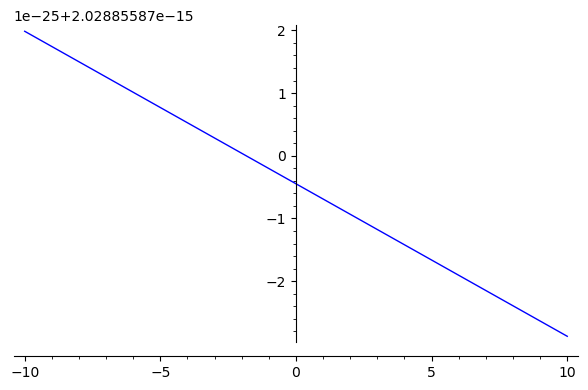

In [101]:
plot(-1/4*msol^(1/3)*real_nth_root((1/1713319801664763*t/pi - 11007615141539/37693035636624786/pi),1/6), t,-10,10)

Por fim, para encontrar as novas expressões para as amplitudes considerando a coalescência, temos apenas que substituir - nas amplitudes anteriores - $\omega_{gw}$ por $\Phi(t)$ no argumento dos senos e cossenos, e $\omega_s$ por $\omega_s(t)$, e todos evoluindo no tempo retardado $t_r$. Com:
$$
\begin{align}
    \Phi(\tau) = -2\left(\frac{5 G M_c}{c^3}\right)^{-5/8}\tau^{5/8} + \Phi_0 
\end{align}
$$

onde $\Phi_0 = \Phi(\tau = 0)$ é uma constante de instegração, igual ao valor de $\Phi$ em sua coalescência. 

In [71]:
Phi0 = var('Phi0', latex_name=r'\Phi_0')

In [72]:
Phi(tau) = -2*(5*G*Mc/(c^3))^(-5/8)*(tau)^(5/8) + Phi0 #  w_gw*t -> \Phi(t)
Phi(tau) 

Phi0 - 2/5*5^(3/8)*tau^(5/8)/(G*(m1 + m2)^(2/5)*(m1*m2/(m1 + m2))^(3/5)/c^3)^(5/8)

Assim, a amplitude da onda gravitacional pode ser expressa diretamente em termos do tempo para a coalescênncia $\tau$, medida pelo observador:

In [73]:
h_plus(t) = (1/r)*(G*Mc/(c^2))^(5/4)*(5/(c*(tc - t)))^(1/4)*((1 + (cos(iota))^2)/2)*cos(Phi).subs({tau : tc - t})
h_plus(t)

1/2*5^(1/4)*(cos(iota)^2 + 1)*(G*(m1 + m2)^(2/5)*(m1*m2/(m1 + m2))^(3/5)/c^2)^(5/4)*(-1/(c*(t - t_c)))^(1/4)*cos(Phi0 - 2/5*5^(3/8)*(-t + t_c)^(5/8)/(G*(m1 + m2)^(2/5)*(m1*m2/(m1 + m2))^(3/5)/c^3)^(5/8))/r

In [74]:
h_plus_para = h_plus.subs(parametros_2)
h_plus_para

t |--> 0.648120091244524*5^(1/4)*(cos(iota)^2 + 1)*(G*msol/c^2)^(5/4)*(-1/(c*(t - t_c)))^(1/4)*cos(Phi0 - 0.351331630529418*5^(3/8)*(-t + t_c)^(5/8)/(G*msol/c^3)^(5/8))/r

In [75]:
h_plus_para = h_plus_para.subs(parametros_1, parametro_R)
h_plus_para

t |--> (3.00871320726901e-19)*5^(1/4)*(cos(iota)^2 + 1)*(-1/(t - t_c))^(1/4)*cos(Phi0 - 728.986220446107*5^(3/8)*(-t + t_c)^(5/8))

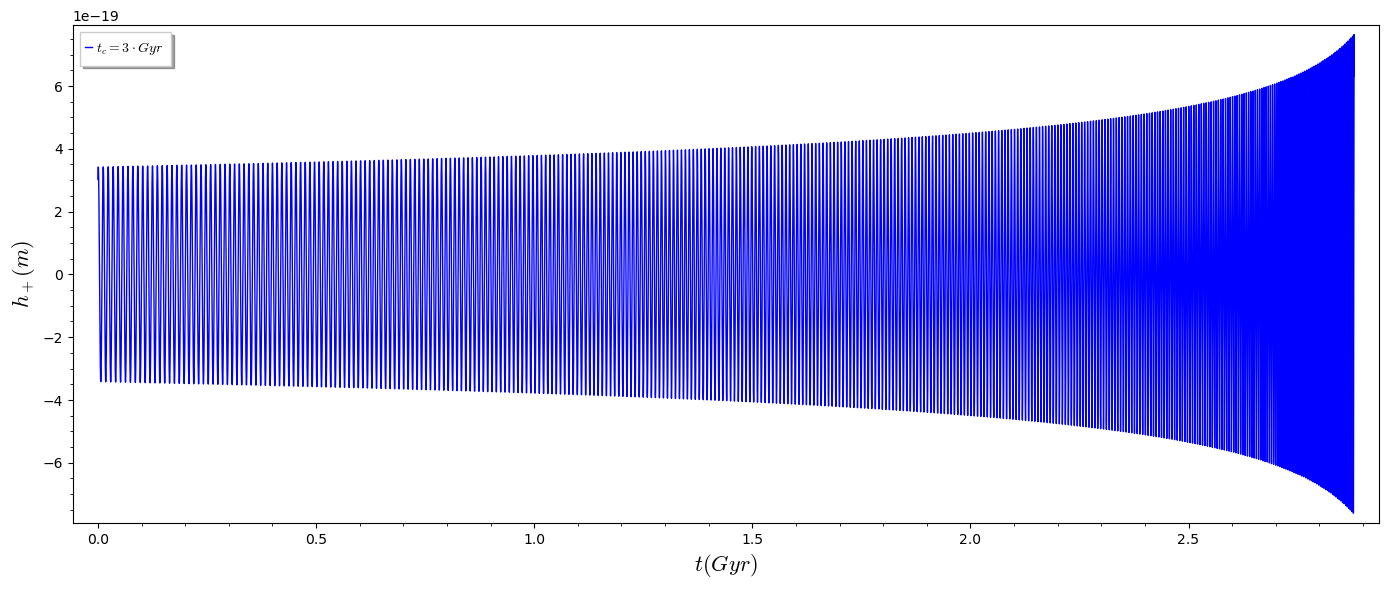

In [76]:
plot(h_plus_para.subs({iota : pi/2}, {tc : 3}, {Phi0 : 3}),(t,0,2.88), plot_points=57842, 
                             frame = True, axes = False,
                             axes_labels=[r'$t(Gyr)$', r'$h_+(m)$'], legend_label=r'$t_c=3 \cdot Gyr$', figsize=[14,6])

In [77]:
g = [plot(h_plus_para.subs({iota : pi/2}, {tc : k}, {Phi0 : 100}),(t,0,(k-0.02)),plot_points=3000, 
                      frame = True, axes = False, color=hue(k/10), alpha=.6, 
                      axes_labels=[r'$t(Gyr)$', r'$h_{+}(m)$'], legend_label=r'$t_c={}$'.format(k.n(digits=2))) 
                         for k in srange(4, 17, 4)]

In [78]:
g_array = graphics_array([[g[0],g[1]],[g[2], g[3]]])

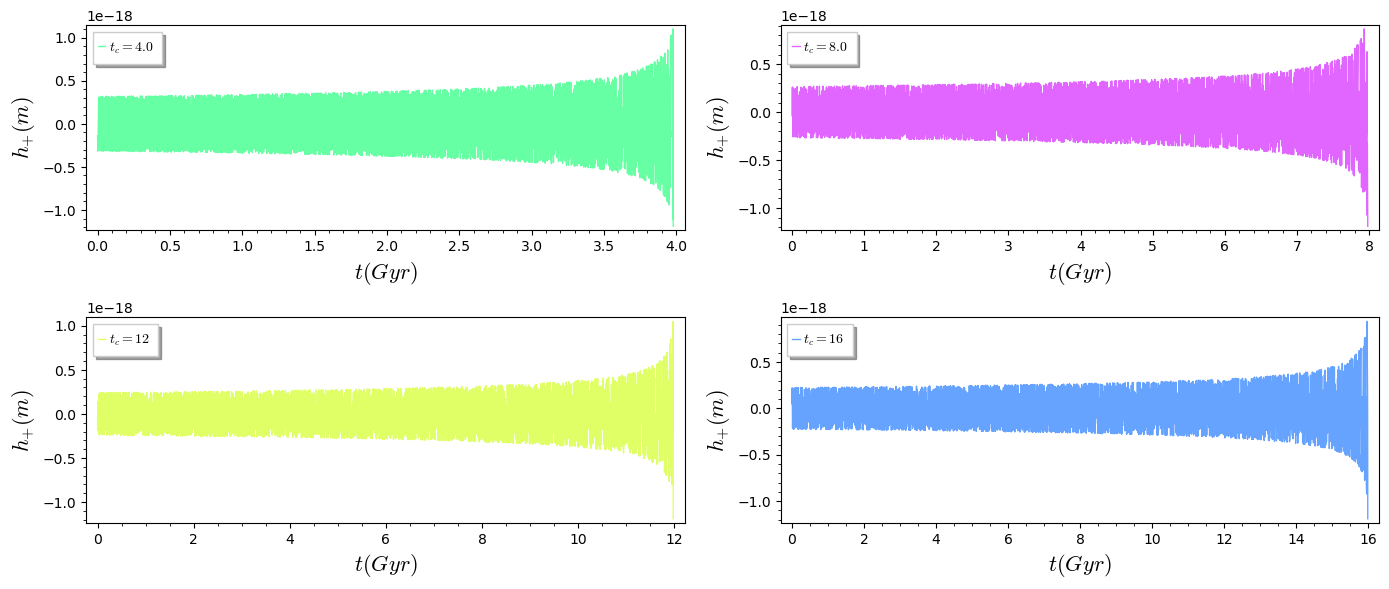

In [79]:
g_array.show(figsize = [14, 6])

In [80]:
#(g_array).save('h+_array_newt.pdf', gridlines=False, frame=True, axes=False, figsize=[14,6])

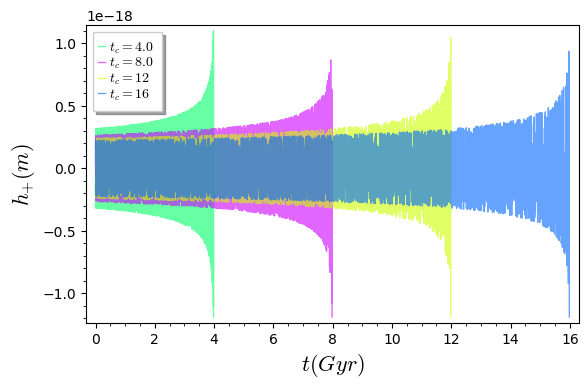

In [81]:
g[0].set_legend_options(loc = 'best')
sum(g)

In [82]:
#(sum(g)).save('h+_newt.pdf', gridlines=False, title='Expansão Newtoniana - $O(\\epsilon^2)$', frame=True, axes=False)

In [83]:
h_cross(t) = (1/r)*(G*Mc/(c^2))^(5/4)*(5/(c*(tc - t)))^(1/4)*(cos(iota))*sin(Phi).subs({tau : tc - t})
h_cross(t)

5^(1/4)*(G*(m1 + m2)^(2/5)*(m1*m2/(m1 + m2))^(3/5)/c^2)^(5/4)*(-1/(c*(t - t_c)))^(1/4)*cos(iota)*sin(Phi0 - 2/5*5^(3/8)*(-t + t_c)^(5/8)/(G*(m1 + m2)^(2/5)*(m1*m2/(m1 + m2))^(3/5)/c^3)^(5/8))/r

In [84]:
h_cross_para = h_cross.subs(parametros_2)
h_cross_para

t |--> 1.29624018248905*5^(1/4)*(G*msol/c^2)^(5/4)*(-1/(c*(t - t_c)))^(1/4)*cos(iota)*sin(Phi0 - 0.351331630529418*5^(3/8)*(-t + t_c)^(5/8)/(G*msol/c^3)^(5/8))/r

In [85]:
h_cross_para = h_cross_para.subs(parametros_1, parametro_R)
h_cross_para

t |--> (6.01742641453802e-19)*5^(1/4)*(-1/(t - t_c))^(1/4)*cos(iota)*sin(Phi0 - 728.986220446107*5^(3/8)*(-t + t_c)^(5/8))

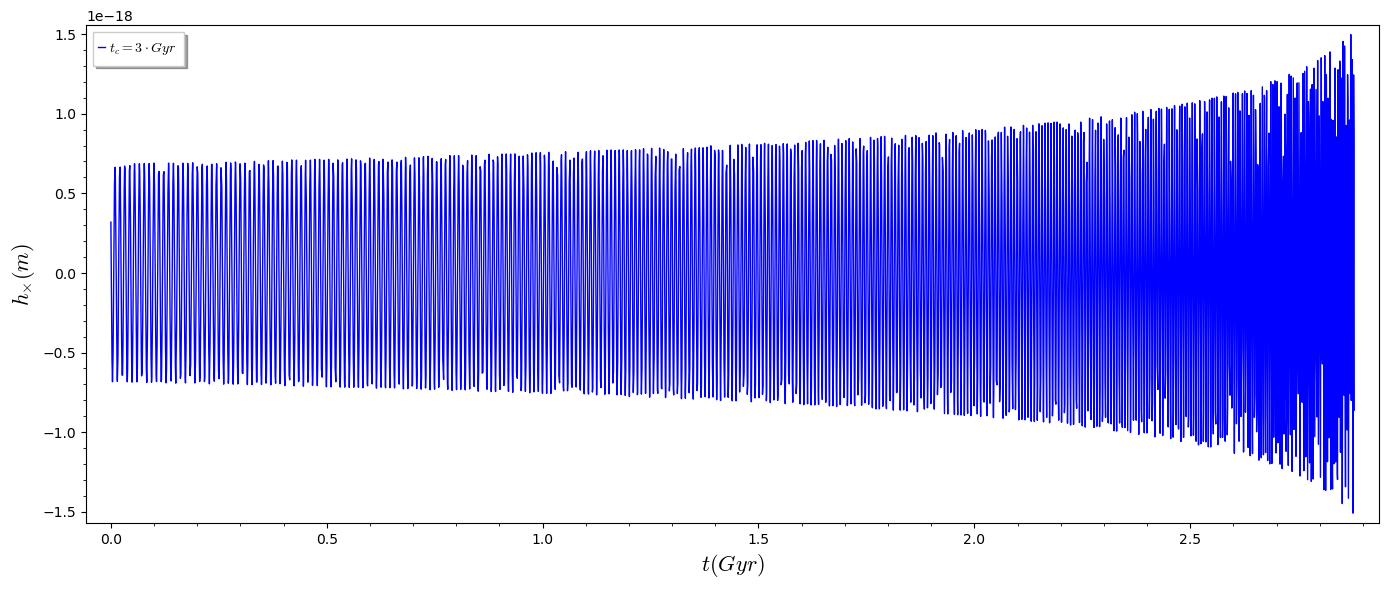

In [86]:
plot(h_cross_para.subs({iota : pi}, {tc : 3}, {Phi0 : 3}),(t,0, 2.88), plot_points=3000, 
                 frame = True, axes = False, axes_labels=[r'$t(Gyr)$', r'$h_{\times}(m)$'], 
                 legend_label=r'$t_c= 3 \cdot Gyr$', figsize=[14,6])

In [87]:
f = [plot(h_cross_para.subs({iota : pi}, {tc : k}, {Phi0 : k}),(t,0,(k-0.02)),plot_points=3000, 
                  frame = True, axes = False, color=hue(k/10), alpha=.6, 
                  axes_labels=[r'$t(Gyr)$', r'$h_{\times}(m)$'], legend_label=r'$t_c={}$'.format(k.n(digits=2))) 
                    for k in srange(4, 17, 4)]

In [88]:
f_array = graphics_array([[f[0],f[1]],[f[2], f[3]]])

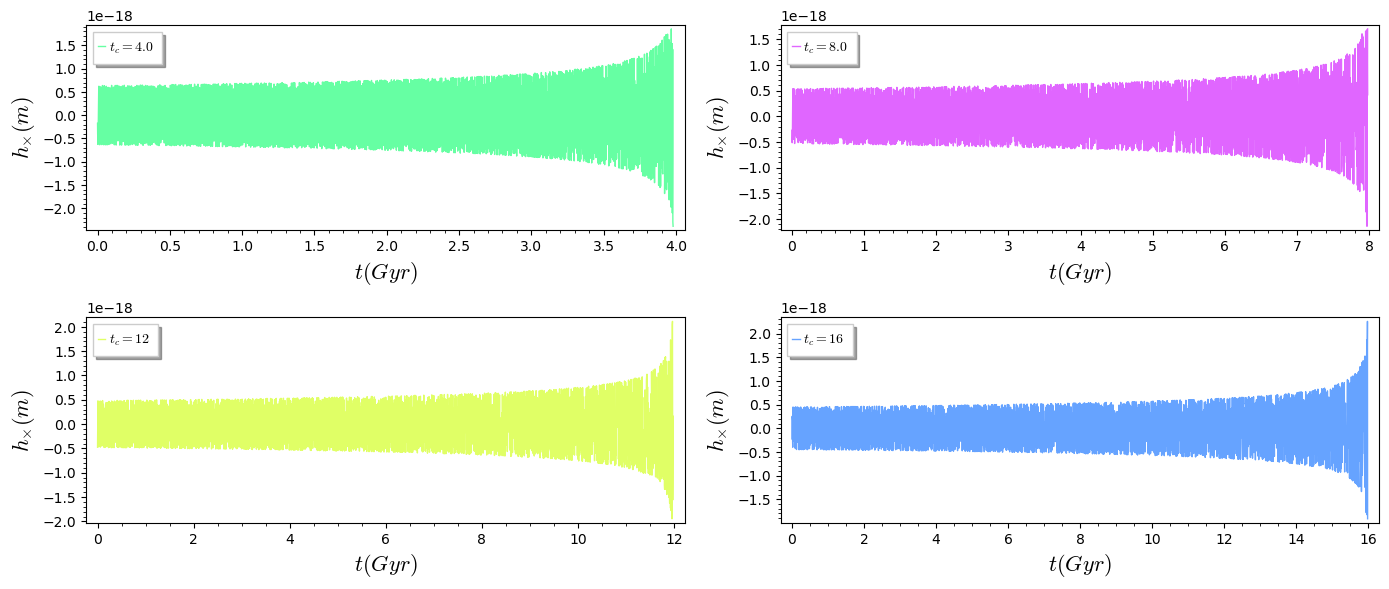

In [89]:
f_array.show(figsize = [14, 6])

In [90]:
#(f_array).save('hx_array_newt.pdf', gridlines=False, frame=True, axes=False, figsize=[14,6])

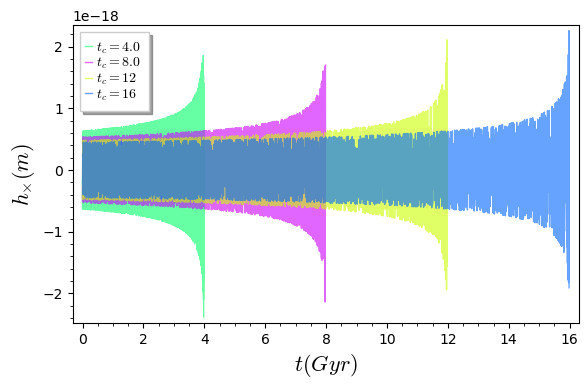

In [91]:
f[0].set_legend_options(loc = 'best')
sum(f)

In [92]:
#(sum(f)).save('hx_newt.pdf', gridlines=False, title='Expansão Newtoniana - $O(\\epsilon^2)$', frame=True, axes=False)